In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.api as sm




In [109]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Data Understanding

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [7]:
df.shape

(973, 15)

In [9]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [11]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


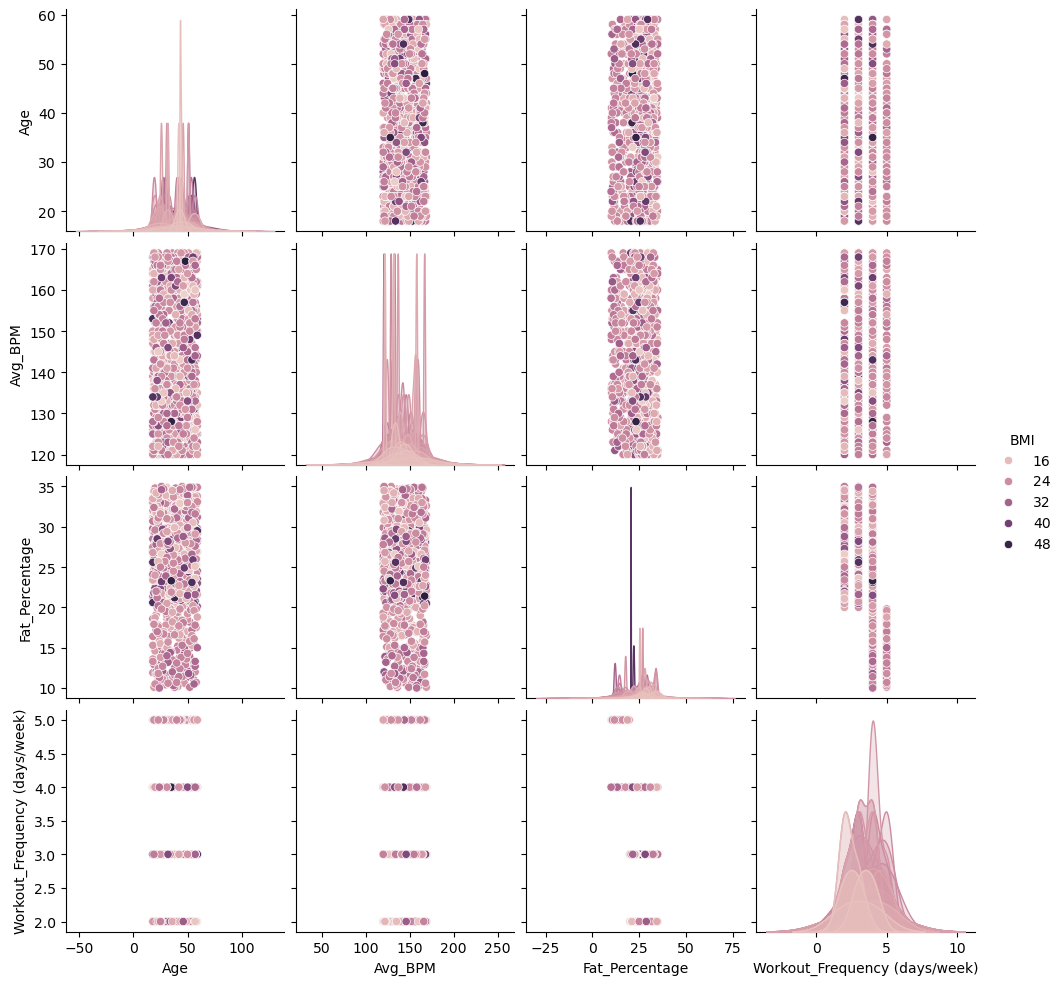

In [17]:
sns.pairplot(df, hue = 'BMI', vars = df[['Age', 'Avg_BPM','Fat_Percentage','Workout_Frequency (days/week)']])
plt.show()
#pair plot showing the relationship between BMI and the following variables: Age, Avg_BPM, Fat_Percentage, and Workout_Frequency

# Preprocessing

In [20]:
df.drop(columns = ['Weight (kg)'], inplace = True)
df.drop(columns = ['Height (m)'], inplace = True)
# height and weight are dropped because it is used to calculate BMI and would skew our model

In [30]:
df.dtypes

Age                                int64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
Gender_Male                        int32
Workout_Type_HIIT                  int32
Workout_Type_Strength              int32
Workout_Type_Yoga                  int32
dtype: object

In [28]:
#changing categorical vaules to numerical values allowing the model to work more effcient
df = pd.get_dummies(df, columns = ['Gender','Workout_Type'], drop_first = True, dtype = int)

KeyError: "None of [Index(['Gender', 'Workout_Type'], dtype='object')] are in the [columns]"

In [32]:
df.shape

(973, 15)

In [34]:
df.head()

,Age,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,0,0,1
1,46,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,1,0,0
2,32,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,0,0,0
3,25,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,0,1,0
4,38,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,0,1,0


In [36]:
df.columns

Index(['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
       'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga'],
      dtype='object')

# Modeling

## No standardization

In [40]:
x = df.drop(columns = ['BMI'], axis = 1)
y = df['BMI']

### Training data with 80% and random state of 42


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((778, 14), (195, 14), (778,), (195,))

In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Evaluate with no standardization 

In [50]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-0.01527291  0.04879548 -0.0218832  -0.02695264 -3.555422    0.00422629
  0.04115005  0.50626259  0.08826153  0.3691164   3.44813215  0.05594495
 -0.7213024  -1.26539664]
Intercept: 17.32958679908645


In [52]:
y_pred = model.predict(x_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)          
rmse = rmse = np.sqrt(mse)

In [56]:
mse , r2 , rmse 

(45.02401044671855, 0.07607997108162068, 6.709993326875859)

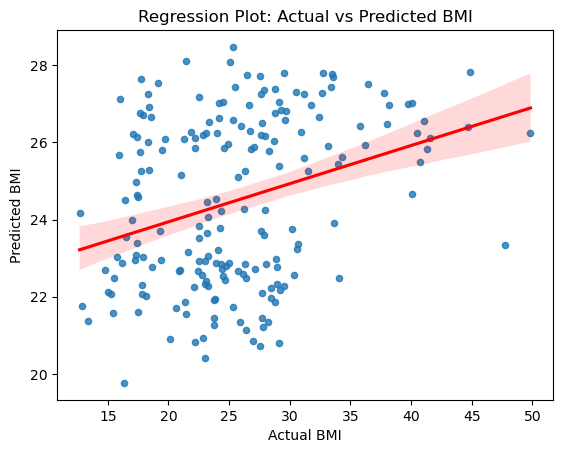

In [58]:
# DataFrame to plot
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Regression plot
sns.regplot(x=plot_data['Actual'], y=plot_data['Predicted'], scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Regression Plot: Actual vs Predicted BMI')
plt.show()

# Now Standardize

In [61]:
scaler = StandardScaler()

In [65]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [67]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(x_test_scaled)

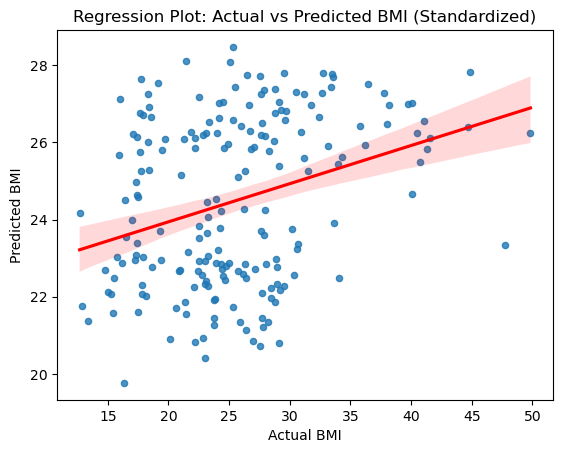

In [71]:
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.regplot(x=plot_data['Actual'], y=plot_data['Predicted'], scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Regression Plot: Actual vs Predicted BMI (Standardized)')

# Show the plot
plt.show()

In [73]:
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)          
rmse = rmse = np.sqrt(mse)

In [75]:
mse , r2 , rmse 

(45.024010446718556, 0.07607997108162046, 6.709993326875859)

### OLS Regression Standardization

In [91]:
OLS_X = df[['Age', 'Avg_BPM','Fat_Percentage','Workout_Frequency (days/week)']]
OLS_Y = df[['BMI']]

OLS_X_train, OLS_X_test, OLS_Y_train, OLS_Y_test = train_test_split(OLS_X, OLS_Y, test_size=0.25, random_state=42)

In [93]:
OLSmodel = linear_model.LinearRegression()
lr_model = OLSmodel.fit(OLS_X_train, OLS_Y_train)

In [95]:
model_sm = sm.OLS(OLS_Y_train, OLS_X_train).fit()

print(model_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    BMI   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              2311.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                        0.00
Time:                        18:44:01   Log-Likelihood:                         -2441.0
No. Observations:                 729   AIC:                                      4890.
Df Residuals:                     725   BIC:                                      4908.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [97]:
OLS_Y_pred = lr_model.predict(OLS_X_test)

mae = mean_absolute_error(OLS_Y_test, OLS_Y_pred).round(2)
mse = mean_squared_error(OLS_Y_test, OLS_Y_pred).round(2)
mape = ((np.mean(np.abs(OLS_Y_test-OLS_Y_pred)/OLS_Y_test) * 100)/len(df)).round(2)

print(f"MAE: {mae}\n MSE:{mse} \n MAPE:{mape}%.")

MAE: 5.42
 MSE:49.19 
 MAPE:0.02%.


Above is the first experiment we conducted with OLS results for our regression model. The features included are average BPM, fat percentage,workout frequency in days/week. This can be viewed as a 'base model' since it included all of the features used in the initial standardization and the pair plots above. The mean absolute error (MAE) measures how the average error of the predictions compare to the actual values. In the result above it shows that the MAE for the model is roughly 5 which is good. Usually when the MAE is lower it means the model is predicting accurately. It is shown in the same unit as the target in our case which is the BMI based on the features so this has to be taken into context when evaluating regression models. The mean squared error (MSE) is an average of the absolute errors which explains why it is higher than the MAE. It can be sometimes difficult to understand since they can be skewed by outliers and scaling issues but this is where the MAPE comes in. The MAPE is the percentage form of the absolute difference between the actial and predicted values. Since the MAPE is 0.02% the model was highly accuate with predictions. 

### OLS Regression Experiment 1 After Standardization

In [99]:
OLS_X = OLS_X.drop(['Workout_Frequency (days/week)'], axis=1)

OLS_X_train, OLS_X_test, OLS_Y_train, OLS_Y_test = train_test_split(OLS_X, OLS_Y, test_size=0.25, random_state=42)

model2_sm = sm.OLS(OLS_Y_train, OLS_X_train).fit()

print(model2_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    BMI   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              3007.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                        0.00
Time:                        18:44:10   Log-Likelihood:                         -2449.7
No. Observations:                 729   AIC:                                      4905.
Df Residuals:                     726   BIC:                                      4919.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [101]:
OLS_Y_pred_2 = model2_sm.predict(OLS_X_test)

mae2 = mean_absolute_error(OLS_Y_test, OLS_Y_pred_2)
mse2 = mean_squared_error(OLS_Y_test, OLS_Y_pred_2)
mape2 = ((np.mean(np.abs(OLS_Y_test-OLS_Y_pred_2)/OLS_Y_test) * 100)/len(df))

print(f"MAE: {mae2}\n MSE:{mse2} \n MAPE:{mape2}%.")

MAE: 5.699660386336265
 MSE:52.34696016187206 
 MAPE:nan%.


After dropping the workout frequency two features were used instead, workout frequency was dropped. Examining the MAE this time and it has changed barely. It changed from 5.42 to 5.70 indicating that the workout frequency feature did not have much of an impact on the prediction results. The MSE did not change much as well and this pattern can be predicted for the MAPE as well, since it says 'nan%' it could be that the percentage is so small that it cannot be shown which still means the model is highly accurate when comparing the predicted target values from the actual ones. 

### OLS Regression Experiment 2 After Standardization

In [103]:
OLS_X = OLS_X.drop(['Fat_Percentage'], axis=1)

OLS_X_train, OLS_X_test, OLS_Y_train, OLS_Y_test = train_test_split(OLS_X, OLS_Y, test_size=0.25, random_state=42)

model3_sm = sm.OLS(OLS_Y_train, OLS_X_train).fit()

print(model3_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    BMI   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              4514.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                        0.00
Time:                        18:44:37   Log-Likelihood:                         -2449.9
No. Observations:                 729   AIC:                                      4904.
Df Residuals:                     727   BIC:                                      4913.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [105]:
OLS_Y_pred_3 = model3_sm.predict(OLS_X_test)

mae3 = mean_absolute_error(OLS_Y_test, OLS_Y_pred_3)
mse3 = mean_squared_error(OLS_Y_test, OLS_Y_pred_3)
mape3 = ((np.mean(np.abs(OLS_Y_test-OLS_Y_pred_3)/OLS_Y_test) * 100)/len(df))

print(f"MAE: {mae3}\n MSE:{mse3} \n MAPE:{mape3}%.")

MAE: 5.695266961556274
 MSE:52.27255713688463 
 MAPE:nan%.


After dropping another feature, this time being fat percentage, the values did not again change much.  This can indicate multiple things. First it means that the standardization is working and to clarify standardization puts all the variables used on the same scale before it is taken into account in the model. It can also mean the variables used are highly correlated with one another, or the model has enough information to predict if the dropped features selected have no impact. Below we have chosen to use a random forest model to further evaluate the regression results.

## Random Forest Model

### Converting BMI into categorical vaules for model 

In [142]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

In [144]:
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

In [131]:
df.columns

Index(['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
       'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga', 'BMI_Category'],
      dtype='object')

In [136]:
#reverting collumns changed with regression model
df['Gender'] =  df['Gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')
workout_columns = [col for col in df.columns if col.startswith('Workout_Type_')]
df['Workout_Type'] = df[workout_columns].idxmax(axis=1).str.replace('Workout_Type_', '')


In [138]:
df['Workout_Type'] = df[workout_columns].idxmax(axis=1).str.replace('Workout_Type_', '')
df = df.drop(columns=['Gender_Male'] + workout_columns)


In [91]:
x_clf = df.drop(columns=['BMI', 'BMI_Category'], axis=1)
y_clf = df['BMI_Category']

In [146]:
df.head()

,Age,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,BMI_Category,Gender,Workout_Type
0,56,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,Obese,Male,Yoga
1,46,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,Obese,Female,HIIT
2,32,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,Normal,Female,HIIT
3,25,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,Underweight,Male,Strength
4,38,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,Underweight,Male,Strength


In [151]:
x_train_clf,x_test_clf,y_train_clf,y_test_clf = train_test_split(x_clf,y_clf,test_size =0.2,random_state=42)

In [160]:
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(x_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [162]:
y_pred_clf = clf_model.predict(x_test_scaled)

C:\Users\patel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### RandomForest Evaul

In [164]:
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Random Forest Classifier Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))

Random Forest Classifier Accuracy: 0.28717948717948716

Classification Report:
               precision    recall  f1-score   support

      Normal       0.29      0.85      0.43        62
       Obese       0.00      0.00      0.00        39
  Overweight       0.25      0.05      0.09        56
 Underweight       0.00      0.00      0.00        38

    accuracy                           0.29       195
   macro avg       0.13      0.23      0.13       195
weighted avg       0.16      0.29      0.16       195



C:\Users\patel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\patel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\patel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


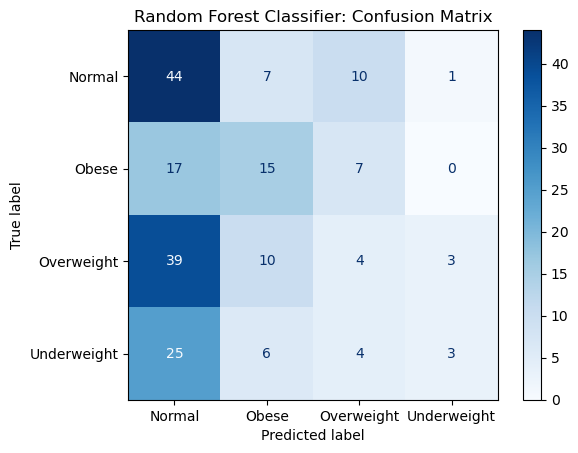

In [166]:
ConfusionMatrixDisplay.from_estimator(clf_model, x_test_clf, y_test_clf, cmap='Blues')
plt.title('Random Forest Classifier: Confusion Matrix')
plt.show()